In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
Covid_19=pd.read_csv('covid 19 dataset.csv')
Covid_19

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
Covid_19.shape

(58, 18)

In [4]:
Covid_19.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [5]:
Covid_19['Recovered'] = Covid_19['Recovered'].fillna(0)
Covid_19['Lat'] = Covid_19['Lat'].fillna(0)
Covid_19['Long_'] = Covid_19['Long_'].fillna(0)
Covid_19['Incident_Rate'] = Covid_19['Incident_Rate'].fillna(0)
Covid_19['People_Tested'] = Covid_19['People_Tested'].fillna(0)
Covid_19['People_Hospitalized'] = Covid_19['People_Hospitalized'].fillna(0)
Covid_19['Mortality_Rate'] = Covid_19['Mortality_Rate'].fillna(0)
Covid_19['Testing_Rate'] = Covid_19['Testing_Rate'].fillna(0)
Covid_19['Hospitalization_Rate'] = Covid_19['Hospitalization_Rate'].fillna(0)

In [6]:
Covid_19.keys

<bound method NDFrame.keys of               Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-05-21 02:32:54  32.3182   
1                     Alaska             US  2020-05-21 02:32:54  61.3707   
2             American Samoa             US  2020-05-21 02:32:54 -14.2710   
3                    Arizona             US  2020-05-21 02:32:54  33.7298   
4                   Arkansas             US  2020-05-21 02:32:54  34.9697   
5                 California             US  2020-05-21 02:32:54  36.1162   
6                   Colorado             US  2020-05-21 02:32:54  39.0598   
7                Connecticut             US  2020-05-21 02:32:54  41.5978   
8                   Delaware             US  2020-05-21 02:32:54  39.3185   
9           Diamond Princess             US  2020-05-21 02:32:54   0.0000   
10      District of Columbia             US  2020-05-21 02:32:54  38.8974   
11                   Florida             US  2

In [7]:
Covid_19.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [8]:
Covid_19.describe

<bound method NDFrame.describe of               Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-05-21 02:32:54  32.3182   
1                     Alaska             US  2020-05-21 02:32:54  61.3707   
2             American Samoa             US  2020-05-21 02:32:54 -14.2710   
3                    Arizona             US  2020-05-21 02:32:54  33.7298   
4                   Arkansas             US  2020-05-21 02:32:54  34.9697   
5                 California             US  2020-05-21 02:32:54  36.1162   
6                   Colorado             US  2020-05-21 02:32:54  39.0598   
7                Connecticut             US  2020-05-21 02:32:54  41.5978   
8                   Delaware             US  2020-05-21 02:32:54  39.3185   
9           Diamond Princess             US  2020-05-21 02:32:54   0.0000   
10      District of Columbia             US  2020-05-21 02:32:54  38.8974   
11                   Florida             U

In [9]:
Covid_19.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,35.569741,-82.268455,26756.086207,1611.017241,5074.344828,20070.724138,3288.086207,382.567674,2.180654e+05,2786.482759,4.381382,7.676194e+07,3759.904564,8.160412
std,12.662834,51.328392,52562.031122,4084.750891,10393.125384,41294.705318,17408.350591,402.221849,2.964241e+05,10177.988015,2.195667,2.378302e+07,2029.719694,8.101621
min,-14.271000,-170.132000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.600000e+01,0.000000,0.000000
25%,33.761575,-99.697700,2596.000000,74.000000,0.000000,812.500000,18.250000,139.910412,4.166725e+04,0.000000,2.952622,8.400001e+07,2649.226598,0.000000
50%,38.978600,-86.797300,10148.500000,385.000000,1079.500000,5644.500000,32.500000,244.809981,1.334500e+05,178.500000,4.382399,8.400003e+07,3440.890063,8.403869
75%,42.214075,-75.830850,29395.500000,1394.250000,4383.750000,19291.250000,47.750000,462.828082,2.620348e+05,1722.750000,5.450908,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


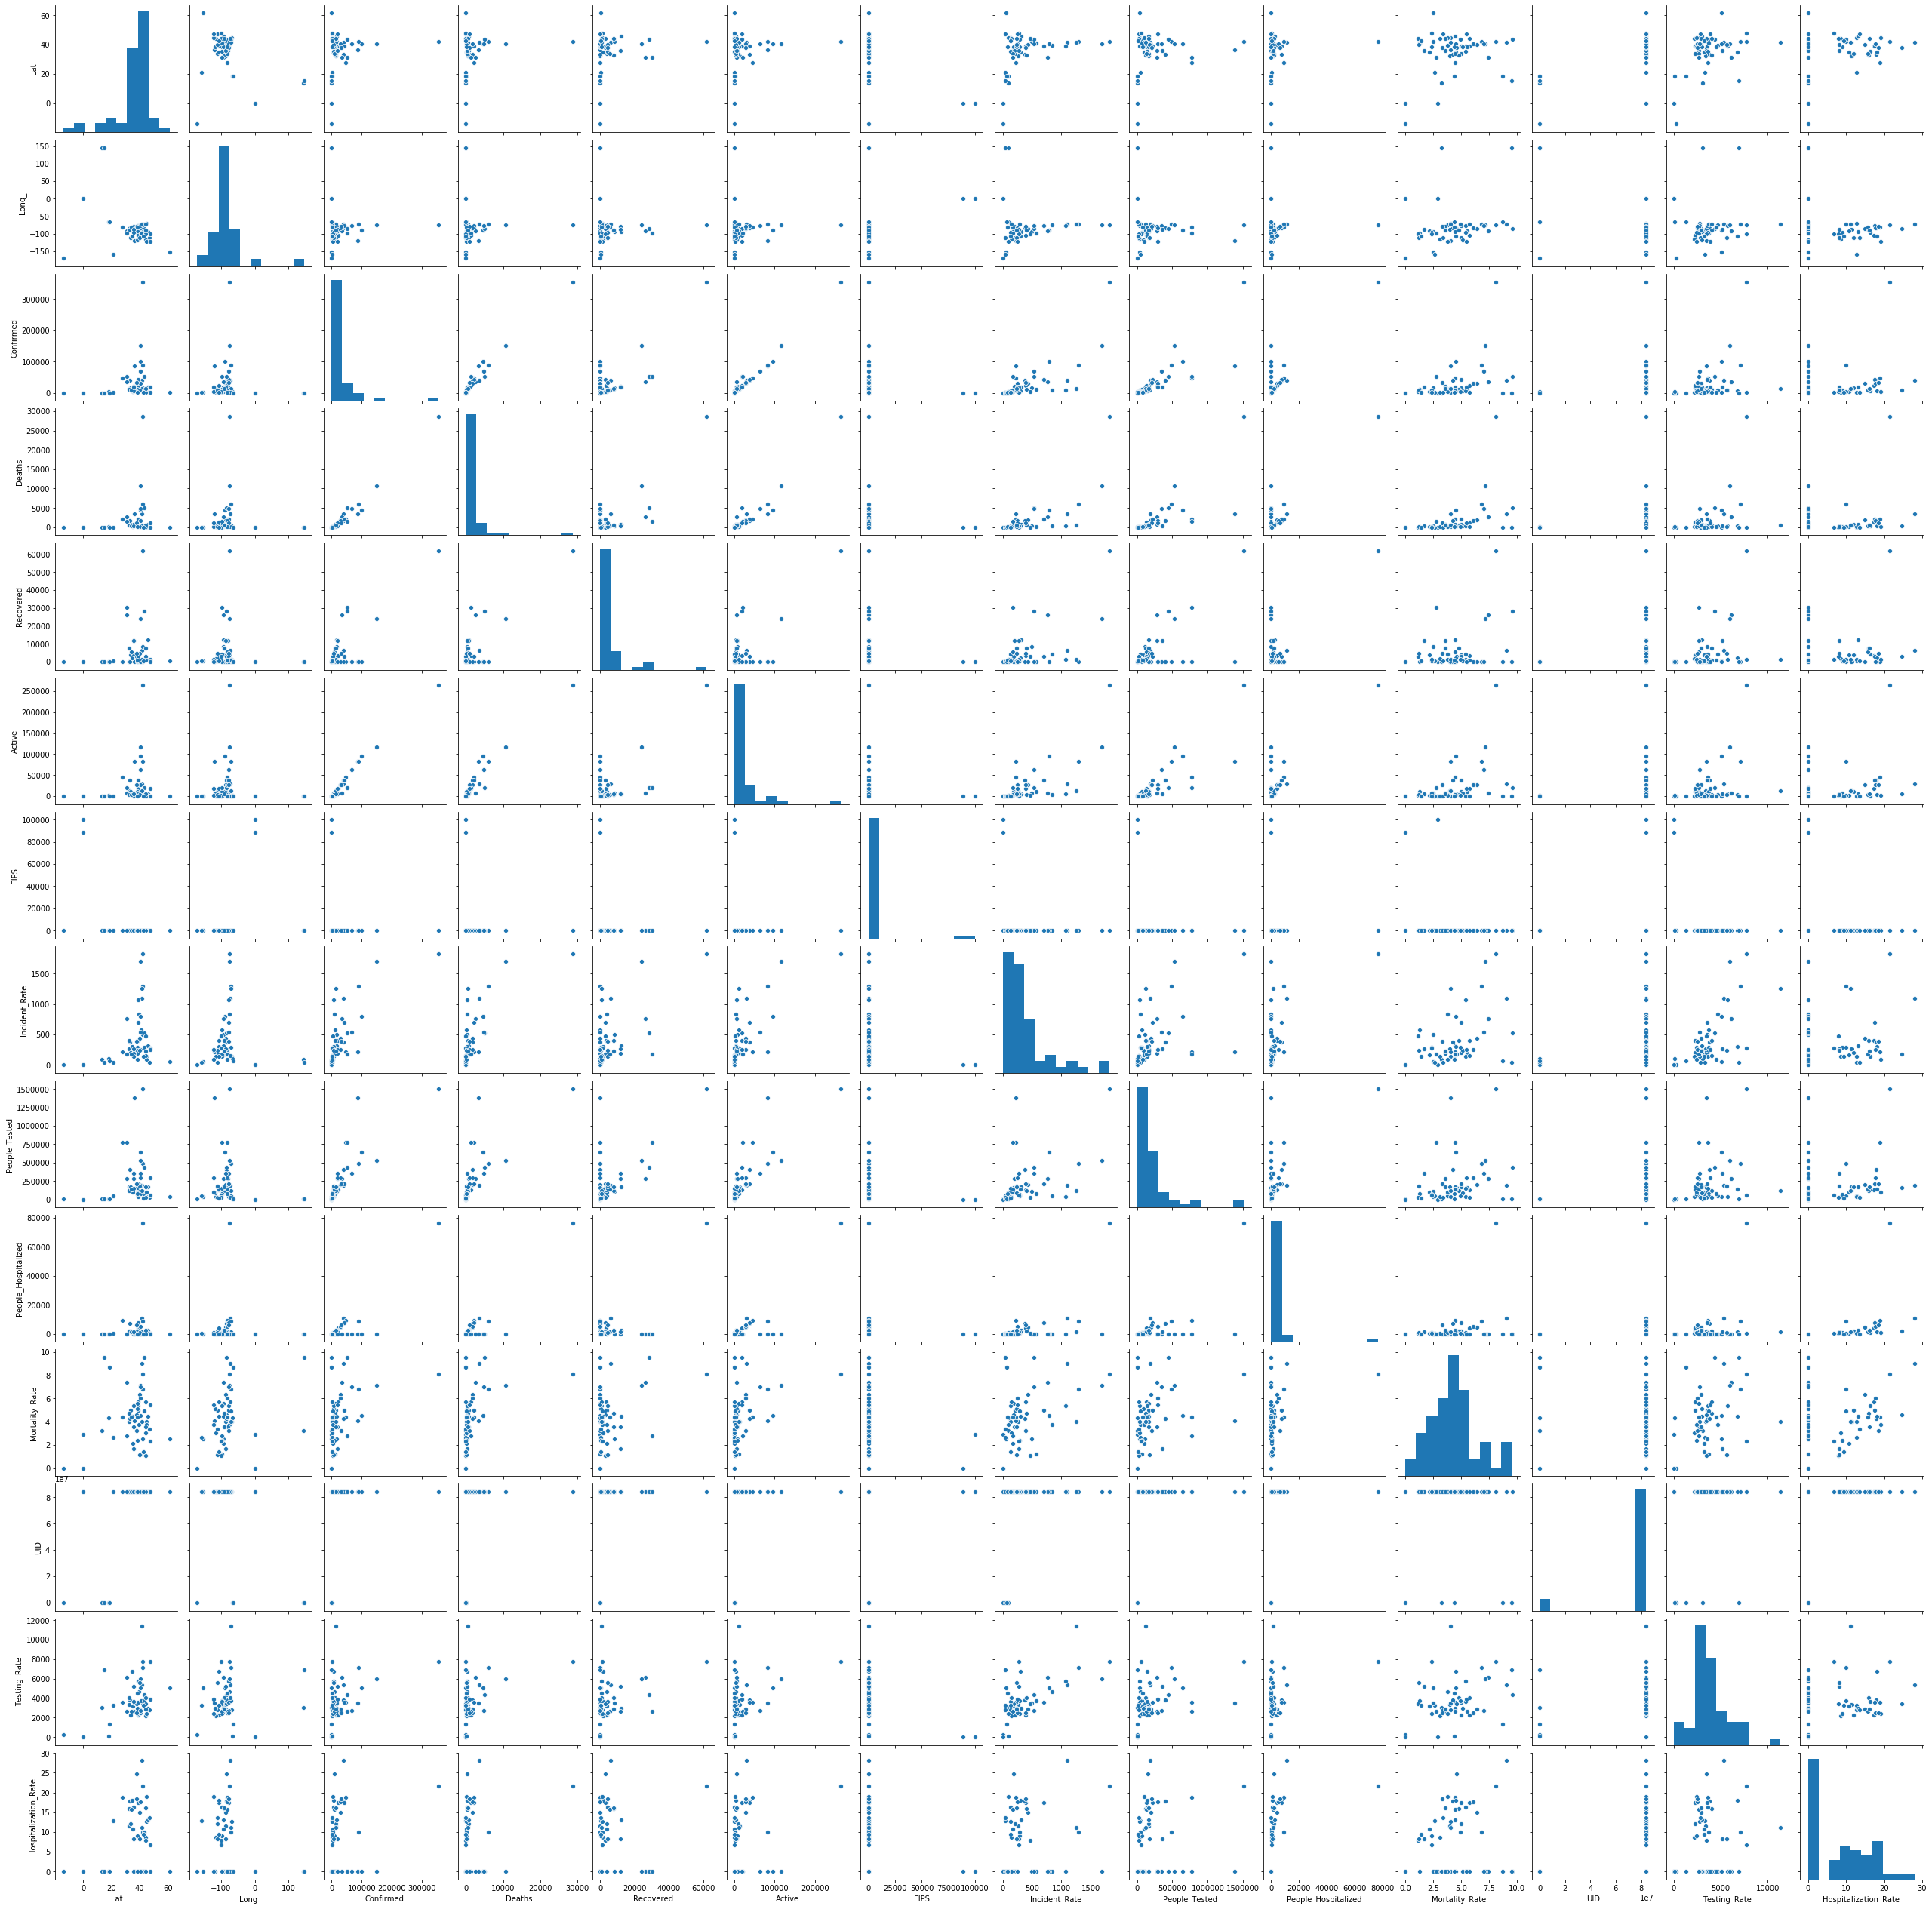

In [10]:
sns.pairplot(Covid_19)

<function matplotlib.pyplot.show(*args, **kw)>

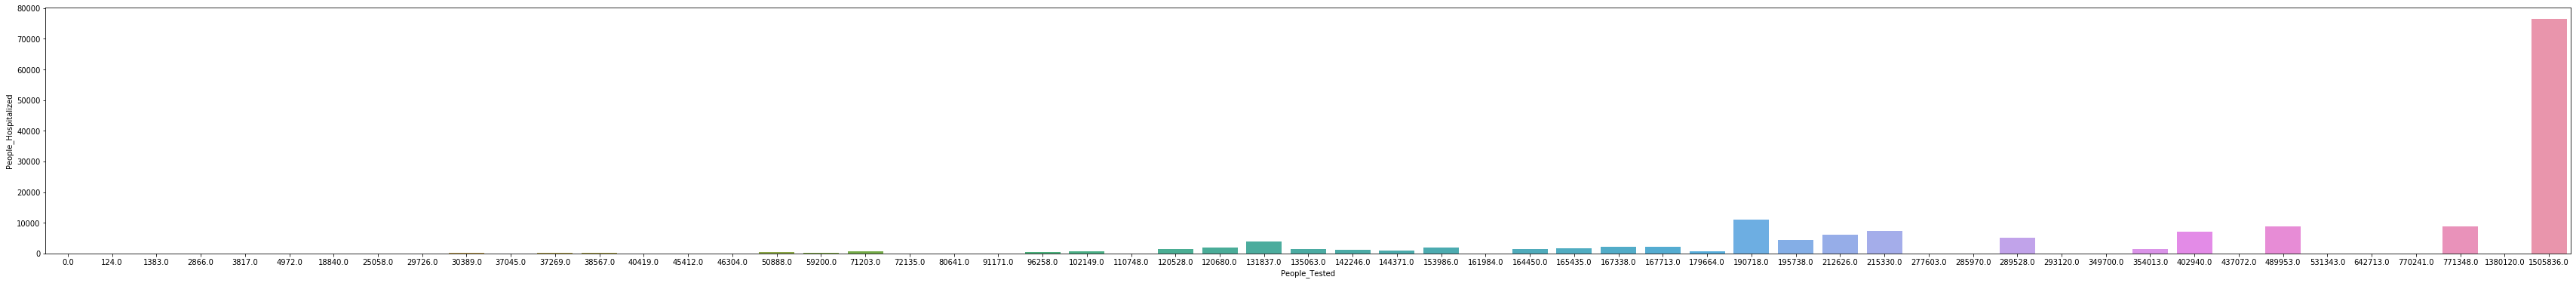

In [11]:
plt.figure(figsize=(60,6))
sns.barplot(x=Covid_19['People_Tested'],y=Covid_19['People_Hospitalized'],data=Covid_19)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

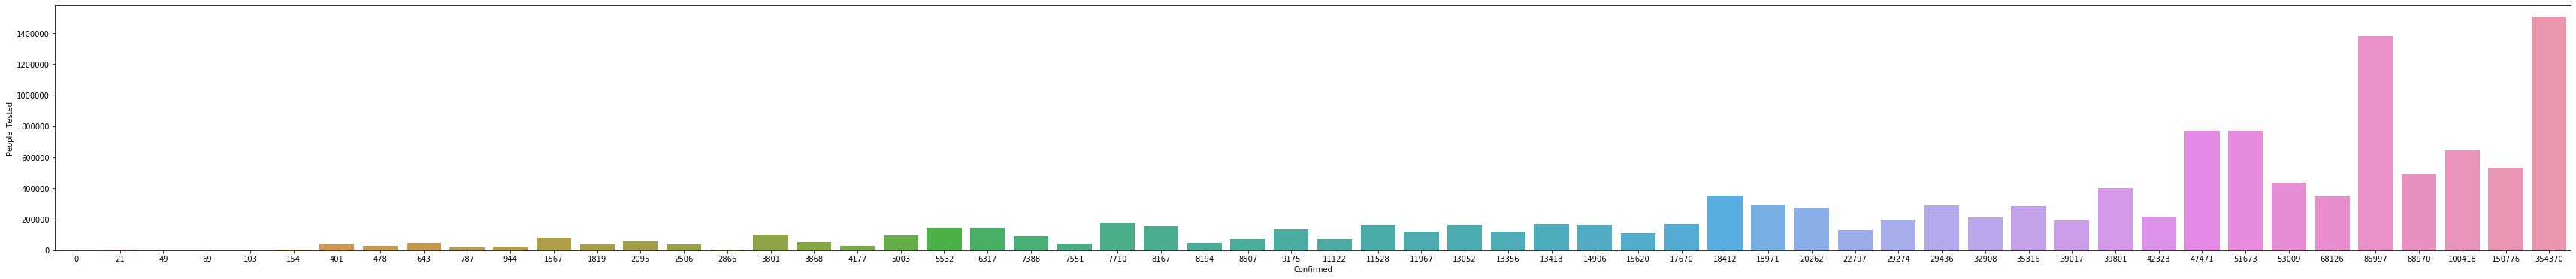

In [12]:
plt.figure(figsize=(60,6))
sns.barplot(x=Covid_19['Confirmed'],y=Covid_19['People_Tested'],data=Covid_19)
plt.show

(array([50.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0. ,  2863.6,  5727.2,  8590.8, 11454.4, 14318. , 17181.6,
        20045.2, 22908.8, 25772.4, 28636. ]),
 <a list of 10 Patch objects>)

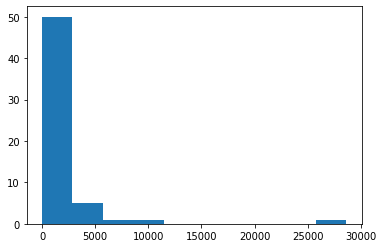

In [13]:
plt.hist(x='Deaths',bins=10,data=Covid_19)

(array([32., 15.,  4.,  2.,  1.,  2.,  0.,  0.,  0.,  2.]),
 array([      0. ,  150583.6,  301167.2,  451750.8,  602334.4,  752918. ,
         903501.6, 1054085.2, 1204668.8, 1355252.4, 1505836. ]),
 <a list of 10 Patch objects>)

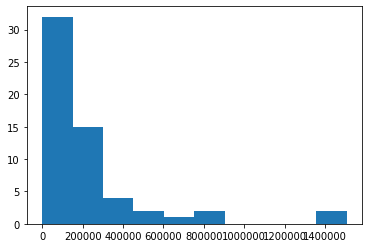

In [14]:
plt.hist(x='People_Tested',bins=10,data=Covid_19)

(array([20., 18.,  9.,  2.,  3.,  1.,  2.,  1.,  0.,  2.]),
 array([   0.        ,  182.16202165,  364.32404329,  546.48606494,
         728.64808659,  910.81010824, 1092.97212988, 1275.13415153,
        1457.29617318, 1639.45819483, 1821.62021647]),
 <a list of 10 Patch objects>)

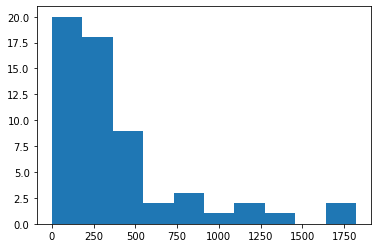

In [15]:
plt.hist(x='Incident_Rate',bins=10,data=Covid_19)

In [16]:
a=Covid_19.iloc[:,0:6]
b=Covid_19.iloc[:,7:-1]

In [17]:
a

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194
9,Diamond Princess,US,2020-05-21 02:32:54,0.0000,0.0000,49


In [18]:
b

,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate
0,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386
1,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017
2,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246
3,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351
4,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370
5,0.0,82500.0,6,217.646575,1380120.0,0.0,4.066421,84000006,USA,3492.893832
6,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188
7,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875
8,3965.0,3919.0,10,841.476990,45412.0,0.0,3.783256,84000010,USA,4663.552976
9,0.0,49.0,88888,0.000000,0.0,0.0,0.000000,84088888,USA,0.000000


In [19]:
X = pd.concat([a, b], axis=1, join='inner')

In [20]:
X

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,84000002,USA,5063.940017
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,16,ASM,222.857246
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,0.0,82500.0,6,217.646575,1380120.0,0.0,4.066421,84000006,USA,3492.893832
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,3965.0,3919.0,10,841.476990,45412.0,0.0,3.783256,84000010,USA,4663.552976
9,Diamond Princess,US,2020-05-21 02:32:54,0.0000,0.0000,49,0.0,49.0,88888,0.000000,0.0,0.0,0.000000,84088888,USA,0.000000


In [21]:
# adding dummies to the dataset
X = pd.get_dummies(X)
#y = pd.get_dummies(y)
#df= pd.get_dummies(df)
# limchiahooi/loan-approval-prediction from github only this part for refrence

In [22]:
X

,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,...,Province_State_Wisconsin,Province_State_Wyoming,Country_Region_US,Last_Update_2020-05-21 02:32:54,ISO3_ASM,ISO3_GUM,ISO3_MNP,ISO3_PRI,ISO3_USA,ISO3_VIR
0,32.3182,-86.9023,13052,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,...,0,0,1,1,0,0,0,0,1,0
1,61.3707,-152.4044,401,352.0,39.0,2,54.815493,37045.0,0.0,2.493766,...,0,0,1,1,0,0,0,0,1,0
2,-14.2710,-170.1320,0,0.0,0.0,60,0.000000,124.0,0.0,0.000000,...,0,0,1,1,1,0,0,0,0,0
3,33.7298,-111.4312,14906,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,...,0,0,1,1,0,0,0,0,1,0
4,34.9697,-92.3731,5003,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,...,0,0,1,1,0,0,0,0,1,0
5,36.1162,-119.6816,85997,0.0,82500.0,6,217.646575,1380120.0,0.0,4.066421,...,0,0,1,1,0,0,0,0,1,0
6,39.0598,-105.3111,22797,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,...,0,0,1,1,0,0,0,0,1,0
7,41.5978,-72.7554,39017,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,...,0,0,1,1,0,0,0,0,1,0
8,39.3185,-75.5071,8194,3965.0,3919.0,10,841.476990,45412.0,0.0,3.783256,...,0,0,1,1,0,0,0,0,1,0
9,0.0000,0.0000,49,0.0,49.0,88888,0.000000,0.0,0.0,0.000000,...,0,0,1,1,0,0,0,0,1,0


In [23]:
y=Covid_19.iloc[:,6]

In [24]:
X.shape

(58, 78)

In [25]:
y.shape

(58,)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.25902098, -0.09106687, -0.26299925, ..., -0.13245324,
         0.30714756, -0.13245324],
       [ 2.05532972, -1.37835016, -0.50578841, ..., -0.13245324,
         0.30714756, -0.13245324],
       [-3.97036244, -1.7267427 , -0.51348412, ..., -0.13245324,
        -3.25576412, -0.13245324],
       ...,
       [ 0.23272626,  0.02582257, -0.48341135, ..., -0.13245324,
         0.30714756, -0.13245324],
       [ 0.69295166, -0.14440782, -0.25607119, ..., -0.13245324,
         0.30714756, -0.13245324],
       [ 0.57246442, -0.49198282, -0.49838056, ..., -0.13245324,
         0.30714756, -0.13245324]])

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred=regr.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2 score corresponding to random state: ', r_state,'is: ',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

r2 score corresponding to random state:  42 is:  0.7329406830982268
r2 score corresponding to random state:  43 is:  0.7984667658147128
r2 score corresponding to random state:  44 is:  0.8389712073379485
r2 score corresponding to random state:  45 is:  0.8189576462845729
r2 score corresponding to random state:  46 is:  0.898696830654755
r2 score corresponding to random state:  47 is:  0.538781235878889
r2 score corresponding to random state:  48 is:  0.7585652509564245
r2 score corresponding to random state:  49 is:  0.8768778177152883
r2 score corresponding to random state:  50 is:  0.34677710802899053
r2 score corresponding to random state:  51 is:  0.716918932137224
r2 score corresponding to random state:  52 is:  0.563838969226975
r2 score corresponding to random state:  53 is:  0.8651138746314988
r2 score corresponding to random state:  54 is:  0.6350639120362813
r2 score corresponding to random state:  55 is:  0.8750984688418937
r2 score corresponding to random state:  56 is:  0.

In [28]:
lg=LogisticRegression()
lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.0
[[0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          49       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       1.0
         190       0.00      0.00      0.00       1.0
         202       0.00      0.00      0.00       1.0
         283       0.00      0.00      0.00       1.0
         407       0.00      0.00      0.00       0.0
         522       0.00      0.00      0.00       1.0
         726       0.00      0.00      0.00       1.0
        1299       0.00      0.00      0.00       1.0
        1426       0.00      0.00      0.00       1.0
        1697       0.00

In [31]:
#DescisionTreeClassifier(criterion=gini)
#DecisionTreeClassifier(criterion='entropy')
#Gini and entropy
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.0
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
              precision    recall  f1-score   support

          11       0.00      0.00      0.00       0.0
          49       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       1.0

In [32]:
#k=10
dtc=KNeighborsClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.0
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0

In [33]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.0
[[0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          49       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       1.0
         190       0.00      0.00      0.00       1.0
         202       0.00      0.00      0.00       1.0
         283       0.00      0.00      0.00       1.0
         407       0.00      0.00      0.00       0.0
         522       0.00      0.00      0.00       1.0
         726       0.00      0.00      0.00       1.0
        1299       0.00      0.00      0.00       1.0
        1426       0.00      0.00      0.00       1.0
        1697       0.00